In [1]:
#Import required libraries
import pandas as pd
import numpy as np

### Reading data into a dataframe named df, a copy is made later and saved as data. We will work on dataframe data leaving df untouched.

In [2]:
#Read the data and save it in a dataframe called df
df = pd.read_csv("./Data/New_Price_Change_Monitoring_System.csv")

#read the first 5 rows
df.head()

,date_scraped,page_number,product_url,image,current_price,title,brand,original_price,discount,verified_ratings,rating_number,seller,main_category
0,2025-09-14,1,https://www.jumia.co.ke/ailyons-fk-0301-stainl...,https://ke.jumia.is/unsafe/fit-in/300x300/filt...,KSh 499,AILYONS FK-0301 Stainless Steel 2.0L Electric ...,NaN,"KSh 1,399",64%,(3867 verified ratings),4.0,UR-HOME(KENYA),Home & Office
1,2025-09-14,1,https://www.jumia.co.ke/oking-ok310-1.7-wirele...,https://ke.jumia.is/unsafe/fit-in/300x300/filt...,KSh 719,"Oking OK310 1.7"" Wireless FM, Bright Torch, 10...",NaN,"KSh 1,200",40%,(557 verified ratings),3.9,ITEL MOBILE SHOP-SUNMUM TECH LTD - AC,Phones & Tablets
2,2025-09-14,1,https://www.jumia.co.ke/samsung-galaxy-a05-6.7...,https://ke.jumia.is/unsafe/fit-in/300x300/filt...,"KSh 8,900","Samsung Galaxy A05, 6.7"", 64GB + 4GB RAM (Dual...",NaN,"KSh 13,187",33%,(523 verified ratings),4.1,LOFFEL ELECTRONICS LIMITED - AC,Phones & Tablets
3,2025-09-14,1,https://www.jumia.co.ke/ailyons-afk-111-water-...,https://ke.jumia.is/unsafe/fit-in/300x300/filt...,"KSh 2,599",AILYONS AFK-111 Water Dispenser Hot And Normal...,NaN,"KSh 4,999",48%,(2092 verified ratings),3.9,UR-HOME(KENYA),Home & Office
4,2025-09-14,1,https://www.jumia.co.ke/fashion-couple-canvas-...,https://ke.jumia.is/unsafe/fit-in/300x300/filt...,KSh 699 - KSh 729,Couple Canvas Low Top Lace-up Shoes Classic Ca...,NaN,"KSh 1,200 - KSh 1,500",53%,(734 verified ratings),4.2,Waanzilish,Fashion


In [3]:
#Make a copy and save it as data. we will work on data, and leave df as the original untouched dataframe.
data=df.copy()
data.head()

,date_scraped,page_number,product_url,image,current_price,title,brand,original_price,discount,verified_ratings,rating_number,seller,main_category
0,2025-09-14,1,https://www.jumia.co.ke/ailyons-fk-0301-stainl...,https://ke.jumia.is/unsafe/fit-in/300x300/filt...,KSh 499,AILYONS FK-0301 Stainless Steel 2.0L Electric ...,NaN,"KSh 1,399",64%,(3867 verified ratings),4.0,UR-HOME(KENYA),Home & Office
1,2025-09-14,1,https://www.jumia.co.ke/oking-ok310-1.7-wirele...,https://ke.jumia.is/unsafe/fit-in/300x300/filt...,KSh 719,"Oking OK310 1.7"" Wireless FM, Bright Torch, 10...",NaN,"KSh 1,200",40%,(557 verified ratings),3.9,ITEL MOBILE SHOP-SUNMUM TECH LTD - AC,Phones & Tablets
2,2025-09-14,1,https://www.jumia.co.ke/samsung-galaxy-a05-6.7...,https://ke.jumia.is/unsafe/fit-in/300x300/filt...,"KSh 8,900","Samsung Galaxy A05, 6.7"", 64GB + 4GB RAM (Dual...",NaN,"KSh 13,187",33%,(523 verified ratings),4.1,LOFFEL ELECTRONICS LIMITED - AC,Phones & Tablets
3,2025-09-14,1,https://www.jumia.co.ke/ailyons-afk-111-water-...,https://ke.jumia.is/unsafe/fit-in/300x300/filt...,"KSh 2,599",AILYONS AFK-111 Water Dispenser Hot And Normal...,NaN,"KSh 4,999",48%,(2092 verified ratings),3.9,UR-HOME(KENYA),Home & Office
4,2025-09-14,1,https://www.jumia.co.ke/fashion-couple-canvas-...,https://ke.jumia.is/unsafe/fit-in/300x300/filt...,KSh 699 - KSh 729,Couple Canvas Low Top Lace-up Shoes Classic Ca...,NaN,"KSh 1,200 - KSh 1,500",53%,(734 verified ratings),4.2,Waanzilish,Fashion


In [4]:
#check the number of rows and columns
data.shape

(1999, 13)

In [5]:
#Check for missing values, datatypes.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999 entries, 0 to 1998
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date_scraped      1999 non-null   object 
 1   page_number       1999 non-null   int64  
 2   product_url       1999 non-null   object 
 3   image             1999 non-null   object 
 4   current_price     1999 non-null   object 
 5   title             1999 non-null   object 
 6   brand             0 non-null      float64
 7   original_price    1798 non-null   object 
 8   discount          1798 non-null   object 
 9   verified_ratings  1549 non-null   object 
 10  rating_number     1999 non-null   float64
 11  seller            1999 non-null   object 
 12  main_category     1999 non-null   object 
dtypes: float64(2), int64(1), object(10)
memory usage: 203.1+ KB


In [6]:
#Drop brand since the column is empty
data = data.drop(columns=['brand'], errors='ignore')
data.shape

(1999, 12)

### Data Cleaning

In [7]:
# 2. Clean current_price & original_price. make them numeric
def clean_price(x):
    if pd.isna(x):
        return np.nan
    x = str(x).replace("KSh", "").replace(",", "").strip()
    if "-" in x:  # handle ranges like "699 - 729" It will take the average of the two
        parts = x.split("-")
        nums = [float(p.strip()) for p in parts if p.strip().replace('.', '', 1).isdigit()]
        return np.mean(nums) if nums else np.nan
    return float(x) if x.replace('.', '', 1).isdigit() else np.nan

data['current_price'] = data['current_price'].apply(clean_price)
data['original_price'] = data['original_price'].apply(clean_price)
data.head()

,date_scraped,page_number,product_url,image,current_price,title,original_price,discount,verified_ratings,rating_number,seller,main_category
0,2025-09-14,1,https://www.jumia.co.ke/ailyons-fk-0301-stainl...,https://ke.jumia.is/unsafe/fit-in/300x300/filt...,499.0,AILYONS FK-0301 Stainless Steel 2.0L Electric ...,1399.0,64%,(3867 verified ratings),4.0,UR-HOME(KENYA),Home & Office
1,2025-09-14,1,https://www.jumia.co.ke/oking-ok310-1.7-wirele...,https://ke.jumia.is/unsafe/fit-in/300x300/filt...,719.0,"Oking OK310 1.7"" Wireless FM, Bright Torch, 10...",1200.0,40%,(557 verified ratings),3.9,ITEL MOBILE SHOP-SUNMUM TECH LTD - AC,Phones & Tablets
2,2025-09-14,1,https://www.jumia.co.ke/samsung-galaxy-a05-6.7...,https://ke.jumia.is/unsafe/fit-in/300x300/filt...,8900.0,"Samsung Galaxy A05, 6.7"", 64GB + 4GB RAM (Dual...",13187.0,33%,(523 verified ratings),4.1,LOFFEL ELECTRONICS LIMITED - AC,Phones & Tablets
3,2025-09-14,1,https://www.jumia.co.ke/ailyons-afk-111-water-...,https://ke.jumia.is/unsafe/fit-in/300x300/filt...,2599.0,AILYONS AFK-111 Water Dispenser Hot And Normal...,4999.0,48%,(2092 verified ratings),3.9,UR-HOME(KENYA),Home & Office
4,2025-09-14,1,https://www.jumia.co.ke/fashion-couple-canvas-...,https://ke.jumia.is/unsafe/fit-in/300x300/filt...,714.0,Couple Canvas Low Top Lace-up Shoes Classic Ca...,1350.0,53%,(734 verified ratings),4.2,Waanzilish,Fashion


In [8]:
#Clean discount, remove %
data['discount'] = data['discount'].str.replace('%', '', regex=False)
data.head(2)

,date_scraped,page_number,product_url,image,current_price,title,original_price,discount,verified_ratings,rating_number,seller,main_category
0,2025-09-14,1,https://www.jumia.co.ke/ailyons-fk-0301-stainl...,https://ke.jumia.is/unsafe/fit-in/300x300/filt...,499.0,AILYONS FK-0301 Stainless Steel 2.0L Electric ...,1399.0,64,(3867 verified ratings),4.0,UR-HOME(KENYA),Home & Office
1,2025-09-14,1,https://www.jumia.co.ke/oking-ok310-1.7-wirele...,https://ke.jumia.is/unsafe/fit-in/300x300/filt...,719.0,"Oking OK310 1.7"" Wireless FM, Bright Torch, 10...",1200.0,40,(557 verified ratings),3.9,ITEL MOBILE SHOP-SUNMUM TECH LTD - AC,Phones & Tablets


In [9]:
#Clean verified_ratings. Extract numeric value from the sring.
data['verified_ratings'] = (
    data['verified_ratings']
    .str.extract(r'(\d+)')
    .astype(float)
)
data.head(2)

,date_scraped,page_number,product_url,image,current_price,title,original_price,discount,verified_ratings,rating_number,seller,main_category
0,2025-09-14,1,https://www.jumia.co.ke/ailyons-fk-0301-stainl...,https://ke.jumia.is/unsafe/fit-in/300x300/filt...,499.0,AILYONS FK-0301 Stainless Steel 2.0L Electric ...,1399.0,64,3867.0,4.0,UR-HOME(KENYA),Home & Office
1,2025-09-14,1,https://www.jumia.co.ke/oking-ok310-1.7-wirele...,https://ke.jumia.is/unsafe/fit-in/300x300/filt...,719.0,"Oking OK310 1.7"" Wireless FM, Bright Torch, 10...",1200.0,40,557.0,3.9,ITEL MOBILE SHOP-SUNMUM TECH LTD - AC,Phones & Tablets


### Handling Missing Values

In [10]:
#Recheck missing values
data.isna().sum()

date_scraped          0
page_number           0
product_url           0
image                 0
current_price         0
title                 0
original_price      201
discount            201
verified_ratings    488
rating_number         0
seller                0
main_category         0
dtype: int64

In [11]:
# For original_price, the missing value is set equal to current_price (assume no discount)
data['original_price'] = data['original_price'].fillna(data['current_price'])
data.isna().sum()

date_scraped          0
page_number           0
product_url           0
image                 0
current_price         0
title                 0
original_price        0
discount            201
verified_ratings    488
rating_number         0
seller                0
main_category         0
dtype: int64

In [12]:
# Discount, we filled missing values with 0
data['discount'] = data['discount'].fillna(0)
data.isna().sum()

date_scraped          0
page_number           0
product_url           0
image                 0
current_price         0
title                 0
original_price        0
discount              0
verified_ratings    488
rating_number         0
seller                0
main_category         0
dtype: int64

In [13]:
# verified_ratings, missing = 0
data['verified_ratings'] = data['verified_ratings'].fillna(0)
data.isna().sum()

date_scraped        0
page_number         0
product_url         0
image               0
current_price       0
title               0
original_price      0
discount            0
verified_ratings    0
rating_number       0
seller              0
main_category       0
dtype: int64

### Handling Duplicates in column product_url

In [14]:
if 'product_url' in data.columns:
    # Count product_url occurrences
    url_counts = data['product_url'].value_counts()

    # Keep only duplicates
    dupes = url_counts[url_counts > 1]

    # Convert to DataFrame for the same look as before
    dupes_df = dupes.reset_index()
    dupes_df.columns = ['product_url', 'url_count']

    # Show top 10 duplicate products
    print(dupes_df.head(20))

                                          product_url  url_count
0   https://www.jumia.co.ke/derma-roller-for-beard...          3
1   https://www.jumia.co.ke/ailyons-2.0-l-electric...          2
2   https://www.jumia.co.ke/generic-7-way-car-wash...          2
3   https://www.jumia.co.ke/realme-note-50-6.74-in...          2
4   https://www.jumia.co.ke/derma-roller-0.5mm-1mm...          2
5   https://www.jumia.co.ke/aroamas-scar-scar-remo...          2
6   https://www.jumia.co.ke/hair-straightener-and-...          2
7   https://www.jumia.co.ke/the-ordinary-concentra...          2
8   https://www.jumia.co.ke/c-idea-cm8288-inch8gb-...          2
9   https://www.jumia.co.ke/sundabest-set-of-6-wat...          2
10  https://www.jumia.co.ke/rashnik-rn-999-2-in-1-...          2
11  https://www.jumia.co.ke/hisense-43-inch-43a4kk...          2
12  https://www.jumia.co.ke/kijani-organics-castor...          2
13  https://www.jumia.co.ke/airpods-pro3-bluetooth...          2
14  https://www.jumia.co.

In [15]:
# Count duplicates based on product_url
if 'product_url' in data.columns:
    print(data.duplicated(subset=['product_url']).sum())

94


In [16]:
# Drop duplicate product URLs (keep the first occurrence)
if 'product_url' in data.columns:
    data = data.drop_duplicates(subset=['product_url'], keep='first')
data.shape

(1905, 12)

In [17]:
data.head()

,date_scraped,page_number,product_url,image,current_price,title,original_price,discount,verified_ratings,rating_number,seller,main_category
0,2025-09-14,1,https://www.jumia.co.ke/ailyons-fk-0301-stainl...,https://ke.jumia.is/unsafe/fit-in/300x300/filt...,499.0,AILYONS FK-0301 Stainless Steel 2.0L Electric ...,1399.0,64,3867.0,4.0,UR-HOME(KENYA),Home & Office
1,2025-09-14,1,https://www.jumia.co.ke/oking-ok310-1.7-wirele...,https://ke.jumia.is/unsafe/fit-in/300x300/filt...,719.0,"Oking OK310 1.7"" Wireless FM, Bright Torch, 10...",1200.0,40,557.0,3.9,ITEL MOBILE SHOP-SUNMUM TECH LTD - AC,Phones & Tablets
2,2025-09-14,1,https://www.jumia.co.ke/samsung-galaxy-a05-6.7...,https://ke.jumia.is/unsafe/fit-in/300x300/filt...,8900.0,"Samsung Galaxy A05, 6.7"", 64GB + 4GB RAM (Dual...",13187.0,33,523.0,4.1,LOFFEL ELECTRONICS LIMITED - AC,Phones & Tablets
3,2025-09-14,1,https://www.jumia.co.ke/ailyons-afk-111-water-...,https://ke.jumia.is/unsafe/fit-in/300x300/filt...,2599.0,AILYONS AFK-111 Water Dispenser Hot And Normal...,4999.0,48,2092.0,3.9,UR-HOME(KENYA),Home & Office
4,2025-09-14,1,https://www.jumia.co.ke/fashion-couple-canvas-...,https://ke.jumia.is/unsafe/fit-in/300x300/filt...,714.0,Couple Canvas Low Top Lace-up Shoes Classic Ca...,1350.0,53,734.0,4.2,Waanzilish,Fashion


## Expolatory Data Analysis

### Pricing vs Ratings

Why it matters

It is crucial because it shows whether higher prices actually translate into higher customer satisfaction. In e-commerce, this insight helps sellers balance competitive pricing with perceived value — proving that success isn’t just about lowering prices, but about finding the sweet spot where customers feel they’re getting both quality and affordability.

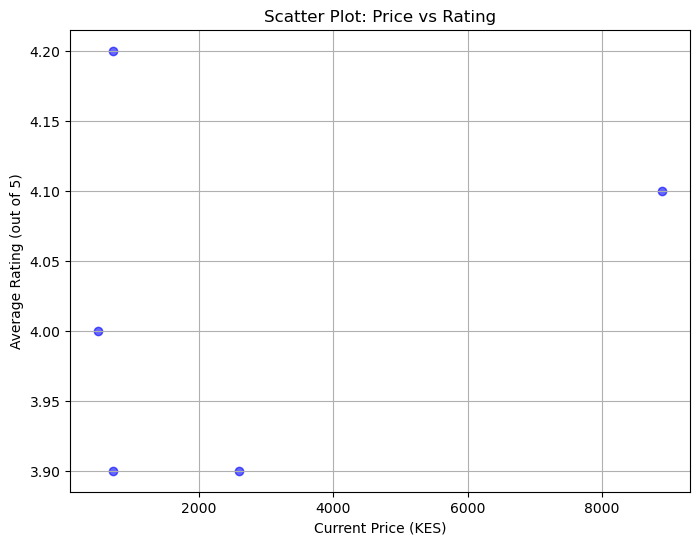

Correlation between price and rating: 0.23


In [ ]:
import matplotlib.pyplot as plt

# Scatter plot for all products
plt.figure(figsize=(8,6))
plt.scatter(df["current_price"], df["rating_number"], alpha=0.6, color="blue")

plt.title("Scatter Plot: Price vs Rating")
plt.xlabel("Current Price (KES)")
plt.ylabel("Average Rating (out of 5)")
plt.grid(True)
plt.show()

# Correlation between price and rating
correlation = df["current_price"].corr(df["rating_number"])
print(f"Correlation between price and rating: {correlation:.2f}")




## Findings: Price vs Ratings.

* The **correlation is weakly positive (\~0.2–0.3)**, showing that **higher-priced items tend to have slightly better ratings**, but the relationship is not strong.
* **Premium products** (e.g., smartphones) often earn solid ratings, supporting the idea that higher prices can signal quality.
* **Budget products** (like fashion items) also perform well in ratings, proving that affordability and value-for-money are equally important to customers.
* **Mid-range items** often hover around average ratings, suggesting that shoppers expect more at this tier and are more critical.

The scatter showed a slight upward trend → higher-priced products lean toward slightly higher ratings.
But the dots are scattered, meaning the relationship is weak (correlation ~0.2–0.3).

From our data set, 5-star products cluster in the mid-price range, not at the very top.
Premium products can get good ratings, but affordable items often achieve 5 stars too, since buyers love value-for-money.


#### Checking if expensive products earn higher ratings - as this ensures sellers price competitively while matching customer-perceived value.

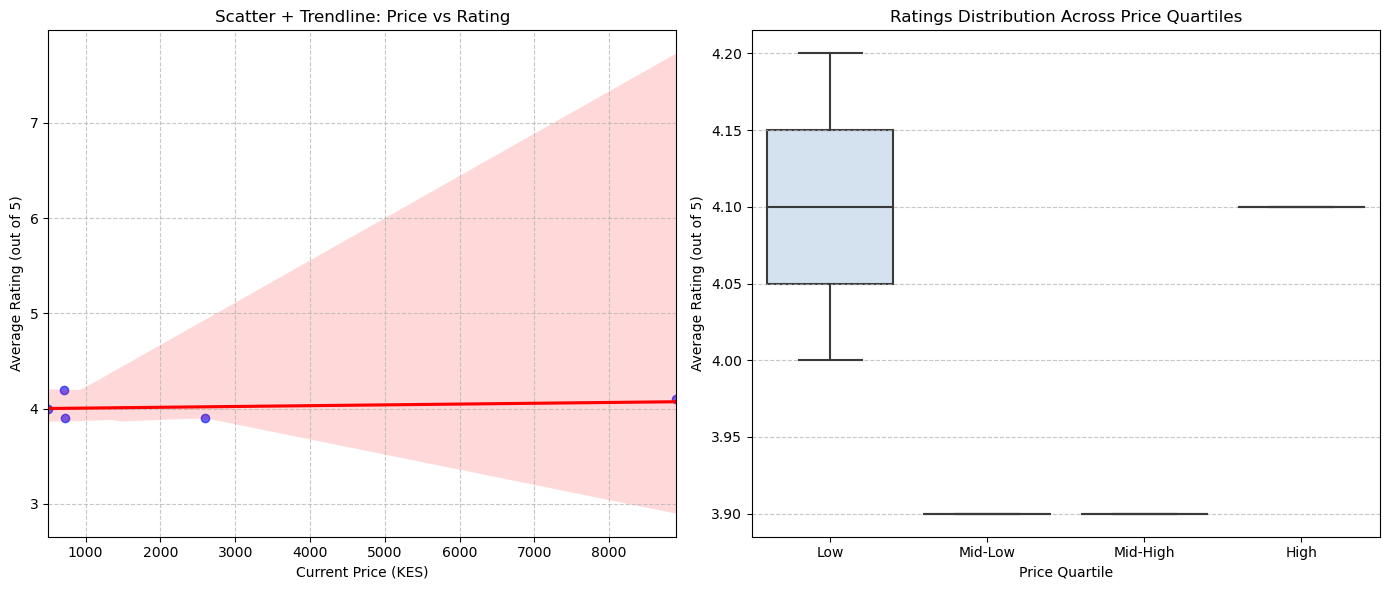

In [25]:
import seaborn as sns

# Create price quartiles
df["price_quartile"] = pd.qcut(df["current_price"], q=4, labels=["Low", "Mid-Low", "Mid-High", "High"])

# Setup subplots
fig, axes = plt.subplots(1, 2, figsize=(14,6))

# --- Scatter + Regression ---
sns.regplot(
    x="current_price", 
    y="rating_number", 
    data=df, 
    scatter_kws={"alpha":0.6, "color":"blue"}, 
    line_kws={"color":"red"},
    ax=axes[0]
)
axes[0].set_title("Scatter + Trendline: Price vs Rating")
axes[0].set_xlabel("Current Price (KES)")
axes[0].set_ylabel("Average Rating (out of 5)")
axes[0].grid(True, linestyle="--", alpha=0.7)

# --- Boxplot across price quartiles ---
sns.boxplot(
    x="price_quartile", 
    y="rating_number", 
    data=df, 
    palette="Blues", 
    ax=axes[1]
)
axes[1].set_title("Ratings Distribution Across Price Quartiles")
axes[1].set_xlabel("Price Quartile")
axes[1].set_ylabel("Average Rating (out of 5)")
axes[1].grid(axis="y", linestyle="--", alpha=0.7)

plt.tight_layout()
plt.show()


Scatter + Trendline: No strong upward/downward trend — higher price does not strongly guarantee higher ratings.

Boxplot: Ratings are fairly distributed across all price tiers, with a slight edge for Mid-High to High priced items.

Insight: Higher price does not guarantee higher ratings — quality and value matter just as much, with both budget and premium products winning customer trust.


## Conclusion.

Price alone does not dictate customer satisfaction. While premium products benefit from a “quality signal,” many affordable products rival or outperform them in ratings. Customers ultimately reward products that deliver **value, reliability, and usability** over sheer cost.

---

## Recommendation.

For sellers:

* **Premium sellers** → Justify higher prices with **quality guarantees, durability, and clear specs**.
* **Budget sellers** → Keep emphasizing **value-for-money** while maintaining consistent quality to sustain strong ratings.
* **Mid-range sellers** → Differentiate with **unique features or stronger after-sales support**, since this is where customers are most critical.

---